In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import tensorflow

import os
import cv2
from PIL import Image
import numpy as np




np.random.seed(27)
tensorflow.random.set_seed(27)

#Read images and get them ready for training
path = r"C:\project\MURA-v1.1\train"
SIZE = 224

import os
dataset = [] 

images_array=[]
anomaly = []
part_label=[]
y_train_class_0=[]
y_train_class_1=[]
y_train_class_2=[]

# Initialize counters
images_per_category = 1000
image_counter = {part: 0 for part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']}


for body in os.listdir(path):
    body_part = body
    if body_part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']:  # Only include specific body parts
        path_p = os.path.join(path, body_part)
        count = 0  # Counter to keep track of images per category
        
        for id_p in os.listdir(path_p):
            if count >= images_per_category:  # Check if we already have 10 images from this category
                break
            patient_id = id_p
            path_id = os.path.join(path_p, id_p)
            for lab in os.listdir(path_id):
                labb = lab
                if count >= images_per_category:  # Check if we already have 10 images from this category
                    break
                if lab.split('_')[-1] == 'positive':
                    label = 1
                elif lab.split('_')[-1] == 'negative':
                    label = 0
                path_l = os.path.join(path_id, labb)
                for img in os.listdir(path_l):
                    if count >=images_per_category:  # Check if we already have 10 images from this category
                        break
                    img_path = os.path.join(path_l, img)
                    image = cv2.imread(img_path)
                    if image is None:
                        print(f"Failed to read image: {img_path}")
                    else:
                        image = Image.fromarray(image, 'RGB')
                        image = image.resize((SIZE, SIZE))
                        images_array.append(np.array(image))
                        anomaly.append(label)
                        part_label.append(body_part)
                        if body_part == 'XR_HUMERUS':
                            y_train_class_0.append(1)
                            y_train_class_1.append(0)
                            y_train_class_2.append(0)
                        elif body_part == 'XR_WRIST':
                            y_train_class_0.append(0)
                            y_train_class_1.append(1)
                            y_train_class_2.append(0)
                        elif body_part == 'XR_ELBOW':
                            y_train_class_0.append(0)
                            y_train_class_1.append(0)
                            y_train_class_2.append(1)
                        count += 1  # Increment counter after adding an image
                        
y_train_class_0=np.array(y_train_class_0)
y_train_class_0
y_train_class_1=np.array(y_train_class_1)
y_train_class_1
y_train_class_2=np.array(y_train_class_2)
y_train_class_2

array([1, 1, 1, ..., 0, 0, 0])

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import os
import cv2
from PIL import Image
import numpy as np


images_array = np.array(images_array)
anomaly = np.array(anomaly)

#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test ,y_class0_train,y_class0_test,y_class1_train,y_class1_test,y_class2_train,y_class2_test= train_test_split(images_array, anomaly,y_train_class_0,y_train_class_1,y_train_class_2, test_size = 0.20, random_state = 0)


X_train = X_train /255.
X_test = X_test /255.


from tensorflow.keras.utils import to_categorical
pp=y_train
qq=y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [4]:
# categorical_anomaly= to_categorical(anomaly)
# print(categorical_anomaly.shape)

In [5]:
from tensorflow.keras.models import load_model, Model

# Load the model
class0_model = load_model(r"C:\Users\user\OneDrive\Desktop\data\Humerus\model_humerus.h5")

# Wrap the loaded model in another Model instance with the desired name
class0_model = Model(inputs=class0_model.inputs, outputs=class0_model.outputs, name='class0')



In [6]:
from tensorflow.keras.models import load_model, Model

# Load the model
class1_model = load_model(r"C:\Users\user\OneDrive\Desktop\data\Wrist\model_wrist.h5")

# Wrap the loaded model in another Model instance with the desired name
class1_model = Model(inputs=class1_model.inputs, outputs=class1_model.outputs, name='class1')

# Load the model
class2_model = load_model(r"C:\Users\user\OneDrive\Desktop\data\Elbow\model_elbow.h5")

# Wrap the loaded model in another Model instance with the desired name
class2_model = Model(inputs=class2_model.inputs, outputs=class2_model.outputs, name='class2')




anomaly_model = load_model(r"C:\Users\user\OneDrive\Desktop\data\model_anomaly.h5")

# Wrap the loaded model in another Model instance with the desired name


In [7]:





# Set all loaded models as non-trainable
for model in [anomaly_model, class0_model, class1_model, class2_model]:
    model.trainable = False

In [8]:
# predictions = anomaly_model.predict(X_test)
# print(predictions)

In [9]:
# print(y_test)

In [10]:
import numpy as np

# Assuming you have arrays: categorical_anomaly, y_train_class_0, y_train_class_1, y_train_class_2

# Reshape the 1D arrays to be compatible for concatenation
y_train_class_0 = y_train_class_0.reshape(-1, 1)  # Assuming it's a column vector
y_train_class_1 = y_train_class_1.reshape(-1, 1)
y_train_class_2 = y_train_class_2.reshape(-1, 1)

# Concatenate arrays along axis 1
concatenated_array = np.concatenate((y_train_class_0, y_train_class_1, y_train_class_2), axis=1)

# Now concatenated_array contains all the arrays concatenated along axis 1

# Example of accessing concatenated elements
print(concatenated_array[0])  # Accessing the first element of concatenated array
print(concatenated_array.shape)


[0 0 1]
(3000, 3)


In [11]:
print(concatenated_array)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [12]:
categorical_anomaly=to_categorical(anomaly)

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import os
import cv2
from PIL import Image
import numpy as np


images_array = np.array(images_array)
anomaly = np.array(anomaly)

#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test ,z_train ,z_test= train_test_split(images_array,categorical_anomaly, concatenated_array, test_size = 0.20, random_state = 0)


X_train = X_train /255.
X_test = X_test /255.


from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate, Input, Dense

# Define input layer for the concatenated model
input_layer = Input(shape=(224, 224, 3))

# Get the outputs of each loaded model
anomaly_output = anomaly_model(input_layer)  # Selecting the first output if there are multiple
class0_output = class0_model(input_layer)
class1_output = class1_model(input_layer)
class2_output = class2_model(input_layer)

#For HybridModel Training

# # # Define dense layers for anomaly output
# anomaly_output = Dense(2, activation='softmax', name='anomaly_output')(anomaly_output)

# # Define dense layers for class0 output
# class0_output = Dense(32, activation='sigmoid', name='class0_output_1')(class0_output)
# class0_output = Dense(1, activation='sigmoid', name='class0_output_2')(class0_output)

# # Define dense layers for class1 output
# class1_output = Dense(32, activation='sigmoid', name='class1_output_1')(class1_output)
# class1_output = Dense(1, activation='sigmoid', name='class1_output_2')(class1_output)

# # Define dense layers for class2 output
# class2_output = Dense(32, activation='sigmoid', name='class2_output_1')(class2_output)
# class2_output = Dense(1, activation='sigmoid', name='class2_output_2')(class2_output)

# Concatenate the outputs of class0, class1, and class2 along the appropriate axis
concatenated_class_output = concatenate([class0_output, class1_output, class2_output])

# Apply a dense layer to convert concatenated outputs to the desired number of classes
#class_combined_output = Dense(3, activation='softmax', name='class_combined_output')(concatenated_class_output)

# Concatenate the outputs along the appropriate axis

concatenated_output = concatenate([anomaly_output, concatenated_class_output])



# Define inputs for the concatenated model
inputs = input_layer

# Define losses for each output
# losses = {
#     'anomaly_output': 'binary_crossentropy',  # Binary cross-entropy for anomaly_output
#     'class_combined_output': 'categorical_crossentropy'  # Categorical cross-entropy for combined class outputs
# }

# Define a new model with the concatenated output and separate losses
#hybrid_model = Model(inputs=inputs, outputs=[anomaly_output,class_combined_output])

# # Compile the concatenated model with separate losses
# hybrid_model.compile(optimizer = SGD(learning_rate=0.1), loss=losses,
#                      metrics=['accuracy','accuracy'])

# Print summary of the concatenated model
hybrid_model = Model(inputs=inputs, outputs=[anomaly_output,concatenated_class_output])
hybrid_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 class0 (Functional)         (None, 1)                    8643201   ['input_1[0][0]']             
                                                                                                  
 class1 (Functional)         (None, 1)                    2679904   ['input_1[0][0]']             
                                                          1                                       
                                                                                                  
 class2 (Functional)         (None, 1)                    1113203   ['input_1[0][0]']         

In [15]:
# hybrid_model.fit(X_train, [y_train, z_train], epochs=30, batch_size=64, validation_split=0.2)

In [16]:
# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(epochs, acc, 'y', label='Training acc')
# plt.plot(epochs, val_acc, 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [17]:
X_test.shape

(600, 224, 224, 3)

In [18]:
z_test.shape

(600, 3)

In [19]:
z_test

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [20]:
prediction = hybrid_model.predict(X_test)

print(prediction)


19/19 [==============================] - 174s 9s/step
[array([[2.9926596e-02, 9.7007340e-01],
       [9.8716611e-01, 1.2833918e-02],
       [7.1134537e-01, 2.8865463e-01],
       ...,
       [5.8197534e-01, 4.1802463e-01],
       [9.3021119e-01, 6.9788873e-02],
       [5.6952874e-08, 1.0000000e+00]], dtype=float32), array([[1.1097493e-04, 4.2693508e-01, 9.9999803e-01],
       [9.9978507e-01, 1.1656921e-03, 9.2234772e-01],
       [9.9914968e-01, 4.5247410e-07, 4.6673828e-01],
       ...,
       [2.1114662e-04, 2.7362511e-01, 3.7461414e-03],
       [2.2799999e-01, 2.2516074e-04, 9.9920785e-01],
       [4.7110261e-05, 9.7062600e-01, 1.7486793e-05]], dtype=float32)]


In [21]:
prediction[1].shape

(600, 3)

In [22]:
prediction[0].shape

(600, 2)


19/19 [==============================] - 96s 5s/step - loss: 0.9020 - accuracy: 0.7833
Accuracy =  78.33333611488342 %


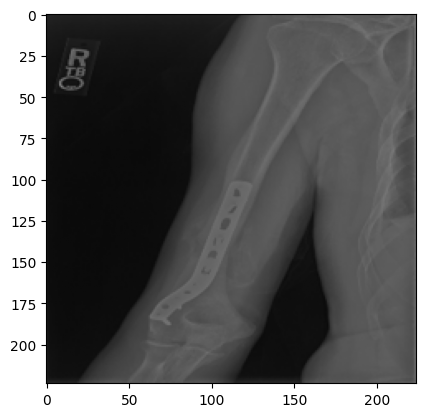

In [23]:
#Check model accuracy on the test data
_, acc = anomaly_model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

#Test on single image.
n=378  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)

In [24]:
print(hybrid_model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [25]:
img=img.reshape(1,224,224,3)
prediction =hybrid_model.predict(img)
print(prediction)

1/1 [==============================] - 1s 976ms/step
[array([[3.7198729e-04, 9.9962795e-01]], dtype=float32), array([[9.9340713e-01, 2.4575158e-11, 3.3223227e-01]], dtype=float32)]


In [26]:
prediction[0]

array([[3.7198729e-04, 9.9962795e-01]], dtype=float32)

In [27]:
prediction[1]

array([[9.9340713e-01, 2.4575158e-11, 3.3223227e-01]], dtype=float32)

In [28]:
body_parts = ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']

anomaly_threshold = 0.5  # Adjust as needed

# Check if an anomaly is present based on the first value of the anomaly_output
if prediction[0][0][1] > anomaly_threshold:  # Checking the second value for anomaly presence
    print("Anomaly is present.")
    # Find the index of the highest probability in concatenated_class_output
    max_index = np.argmax(prediction[1])
    print("Detected body part:", body_parts[max_index])
else:
    print("No anomaly detected.")


Anomaly is present.
Detected body part: XR_HUMERUS


In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming class0_model.predict(X_test) gives the predicted probabilities
y_pred_prob = anomaly_model.predict(X_test)

# Thresholding probabilities to get binary predictions
y_pred = (y_pred_prob >= 0.5).astype(int)

19/19 [==============================] - 77s 4s/step


In [32]:
def plot_heatmap(img, anomaly_model, anomaly_score, body_part_name):
    pred = anomaly_model.predict(np.expand_dims(img, axis=0))
    pred_class = np.argmax(pred)
    # Get weights for all classes from the prediction layer
    last_layer_weights = anomaly_model.layers[-1].get_weights()[0] # Prediction layer
    # Get weights for the predicted class.
    last_layer_weights_for_pred = last_layer_weights[:, pred_class]
    # Get output from the last conv. layer
    last_conv_model = Model(anomaly_model.input, anomaly_model.get_layer("block5_conv3").output)
    last_conv_output = last_conv_model.predict(img[np.newaxis,:,:,:])
    last_conv_output = np.squeeze(last_conv_output)
    
    # Upsample/resize the last conv. output to same size as original image
    h = int(img.shape[0]/last_conv_output.shape[0])
    w = int(img.shape[1]/last_conv_output.shape[1])
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)
    
    heat_map = np.dot(upsampled_last_conv_output.reshape((img.shape[0]*img.shape[1], 512)), 
                 last_layer_weights_for_pred).reshape(img.shape[0], img.shape[1])
    
    # Since we have a lot of dark pixels where the edges may be thought of as 
    # high anomaly, let us drop all heat map values in this region to 0.
    # This is an optional step based on the image. 
    heat_map[img[:,:,0] == 0] = 0  # All dark pixels outside the object set to 0
    
    # Detect peaks (hot spots) in the heat map. We will set it to detect maximum 5 peaks.
    # with rel threshold of 0.5 (compared to the max peak). 
    peak_coords = peak_local_max(heat_map, num_peaks=5, threshold_rel=0.5, min_distance=10) 

    plt.imshow(img.astype('float32').reshape(img.shape[0], img.shape[1], 3))
    plt.imshow(heat_map, cmap='jet', alpha=0.30)
    for i in range(0, peak_coords.shape[0]):
        y = peak_coords[i, 0]
        x = peak_coords[i, 1]
        plt.gca().add_patch(Rectangle((x-25, y-25), 50, 50, linewidth=1, edgecolor='r', facecolor='none'))
    
        # Get the anomaly score for this peak
        # Assuming pred is scalar and represents the anomaly score
        plt.annotate(f"Anomaly: {anomaly_score:.4f}", xy=(x, y), xytext=(x, y-30),
                     color='r', fontsize=10, ha='center', va='center')
        
    # Annotate body part name in the top left corner of the heatmap
    plt.annotate(body_part_name, xy=(0.02, 0.98), xycoords='axes fraction',
                 fontsize=12, color='white', ha='left', va='top', bbox=dict(facecolor='black', alpha=0.5))

    plt.show()


In [33]:
body_parts = ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']

anomaly_threshold = 0.5  # Adjust as needed

# Check if an anomaly is present based on the first value of the anomaly_output
if prediction[0][0][1] > anomaly_threshold:  # Checking the second value for anomaly presence
    print("Anomaly is present.")
    # Find the index of the highest probability in concatenated_class_output
    max_index = np.argmax(prediction[1])
    body_part_name=body_parts[max_index]
    
    print("Detected body part:", body_parts[max_index])
else:
    print("No anomaly detected.")


Anomaly is present.
Detected body part: XR_HUMERUS


1/1 [==============================] - 0s 482ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 430ms/step


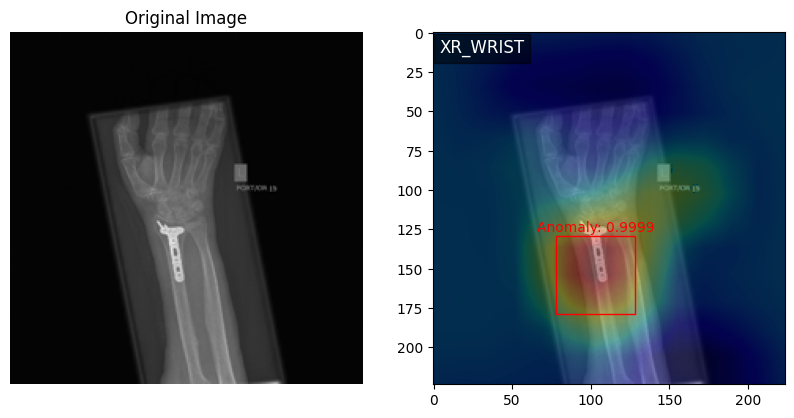

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 359ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 342ms/step


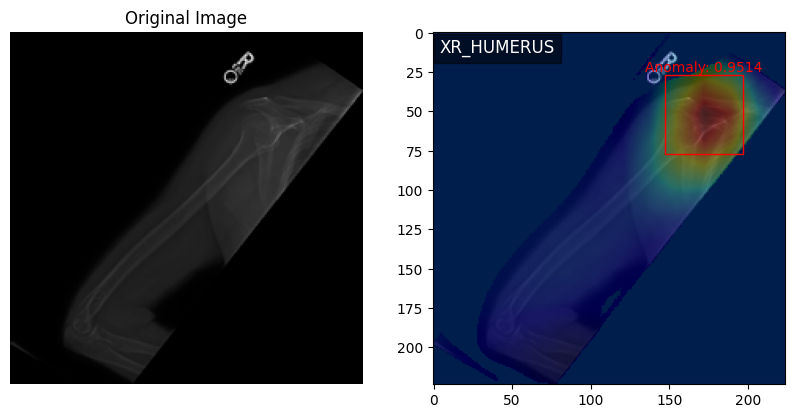

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 453ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 1s 618ms/step


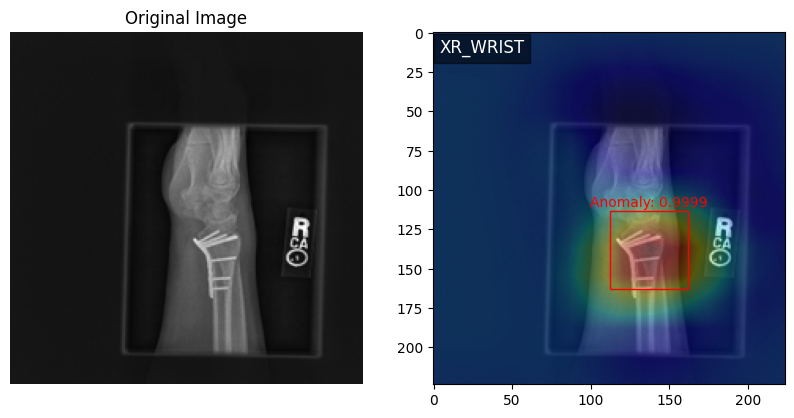

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 412ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 2s 2s/step


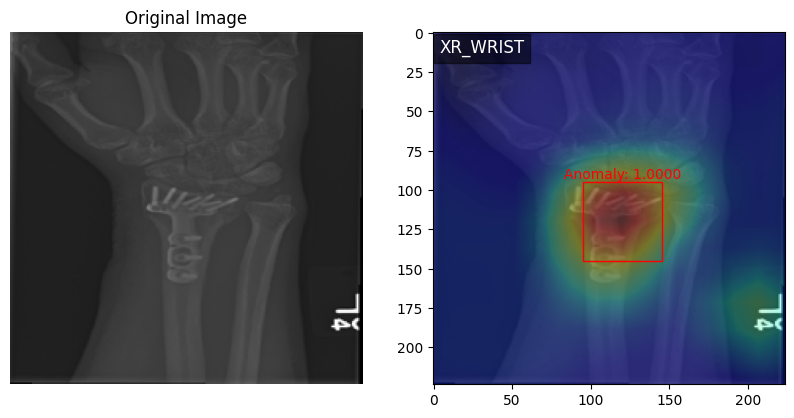

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 343ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 1s 738ms/step


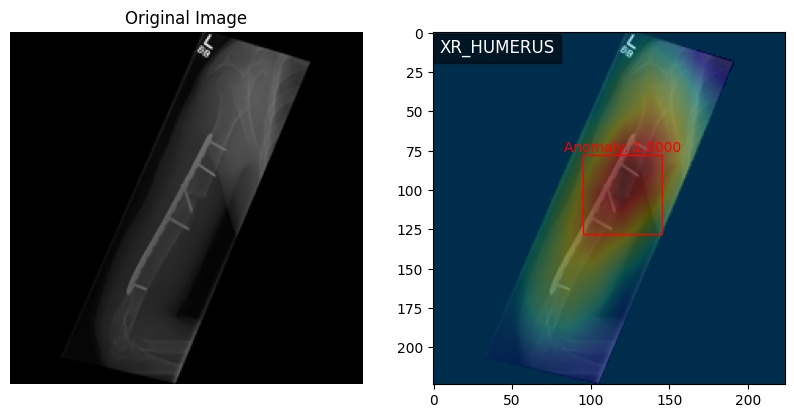

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 365ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 357ms/step


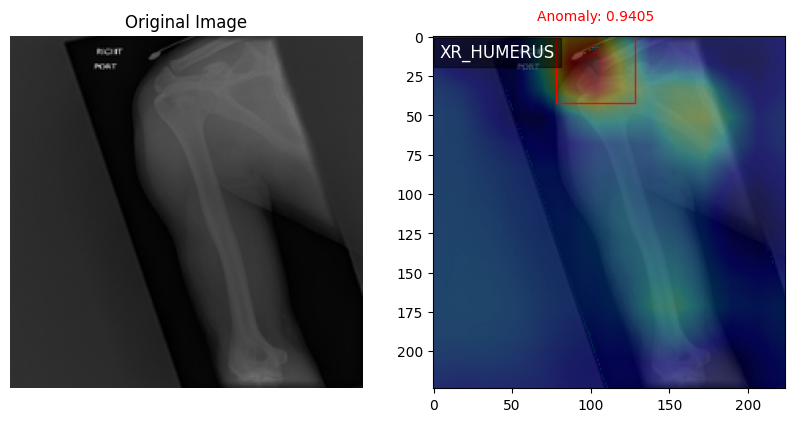

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 335ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 306ms/step


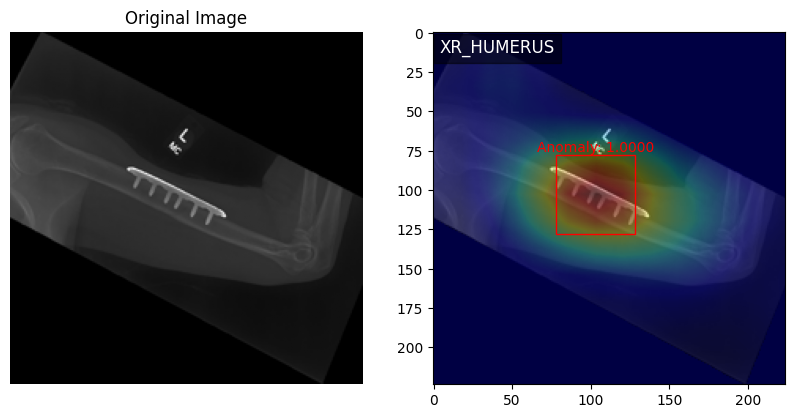

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 333ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 311ms/step


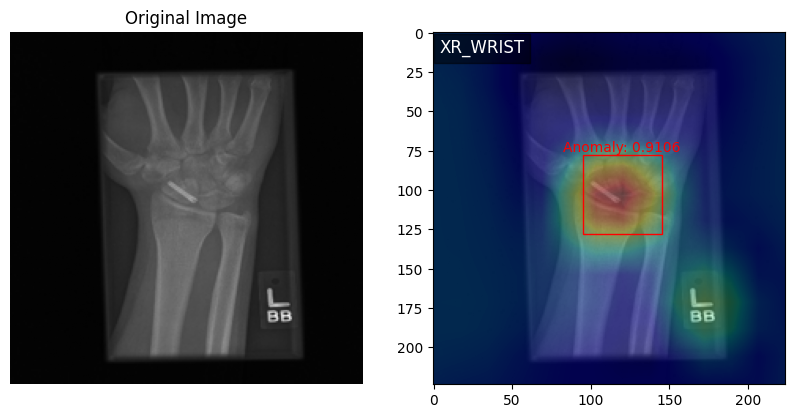

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 408ms/step
Anomaly is present.
Detected body part: XR_ELBOW
1/1 [==============================] - 0s 318ms/step


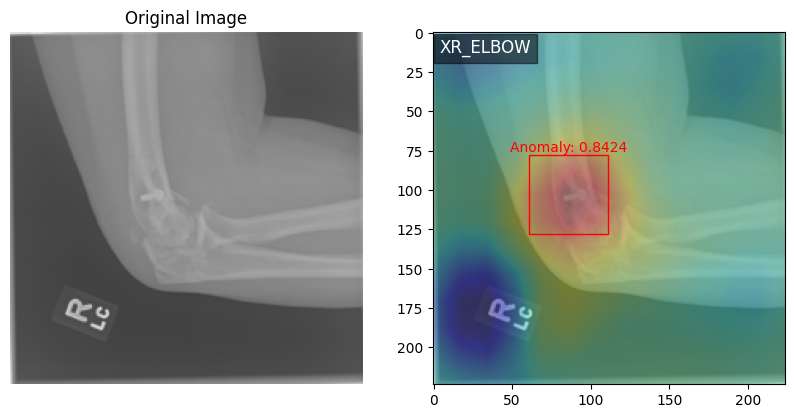

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 380ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 1s 555ms/step


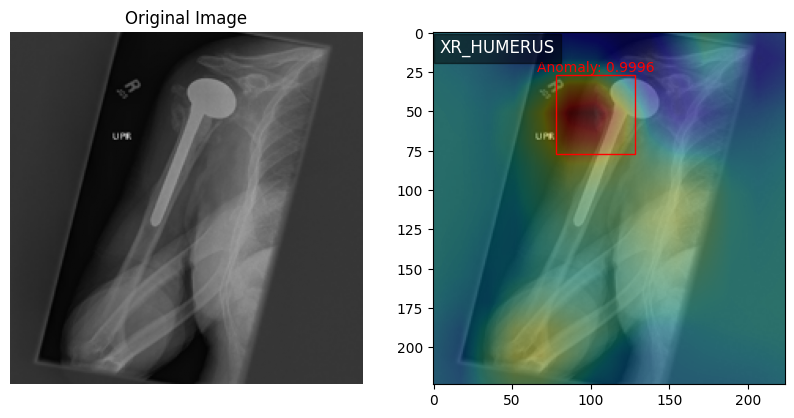

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 380ms/step
Anomaly is present.
Detected body part: XR_ELBOW
1/1 [==============================] - 0s 278ms/step


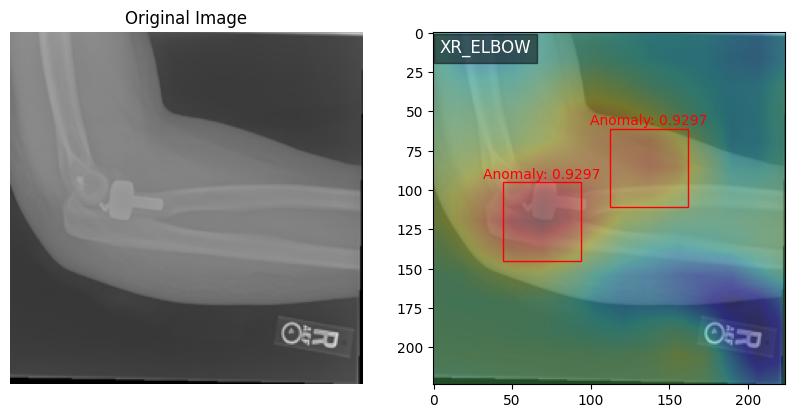

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 365ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 308ms/step


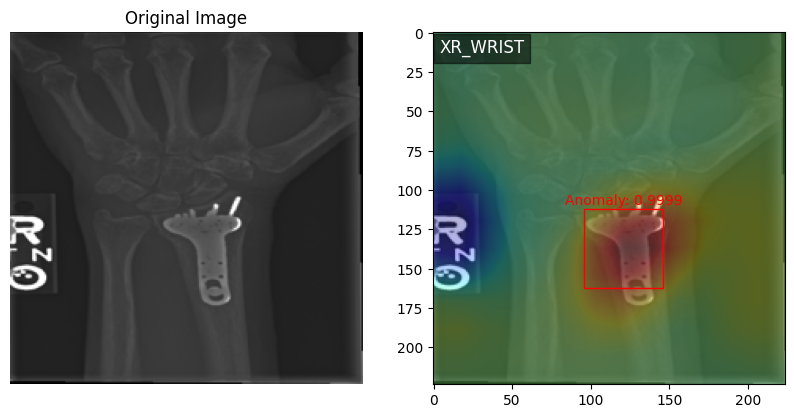

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 340ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 338ms/step


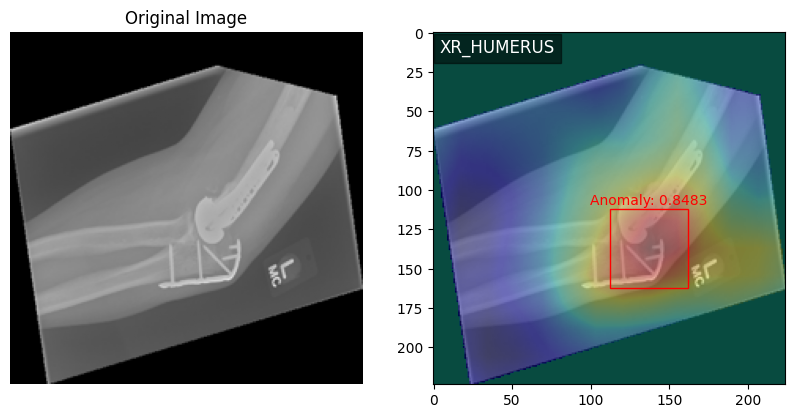

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 376ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 265ms/step


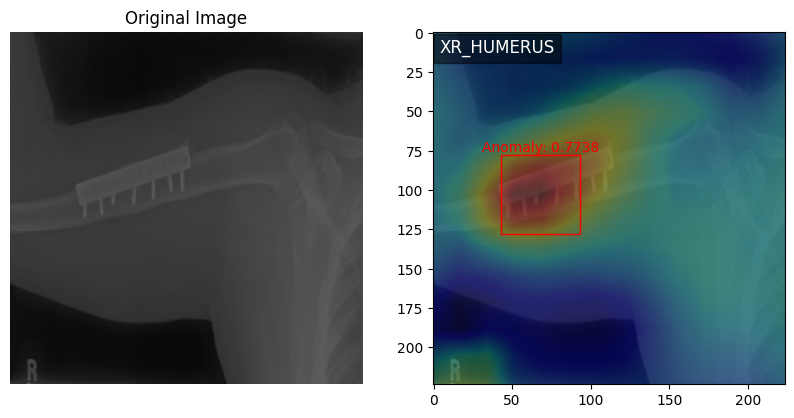

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 354ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 315ms/step


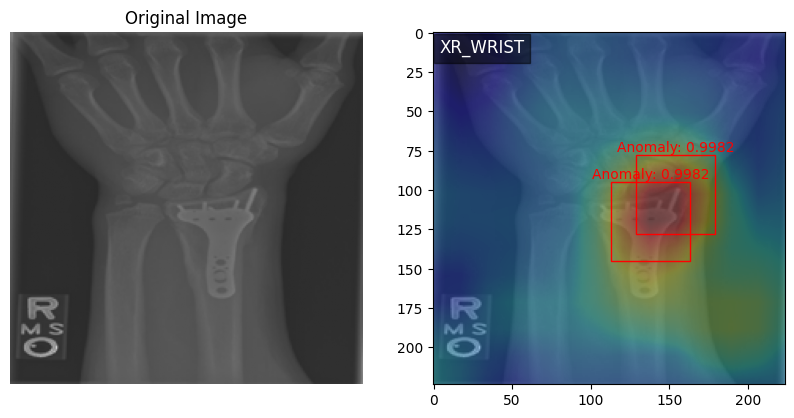

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 360ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 302ms/step


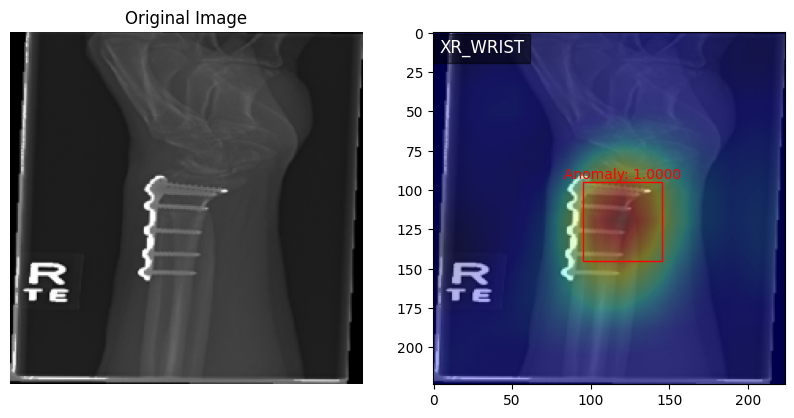

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 394ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 346ms/step


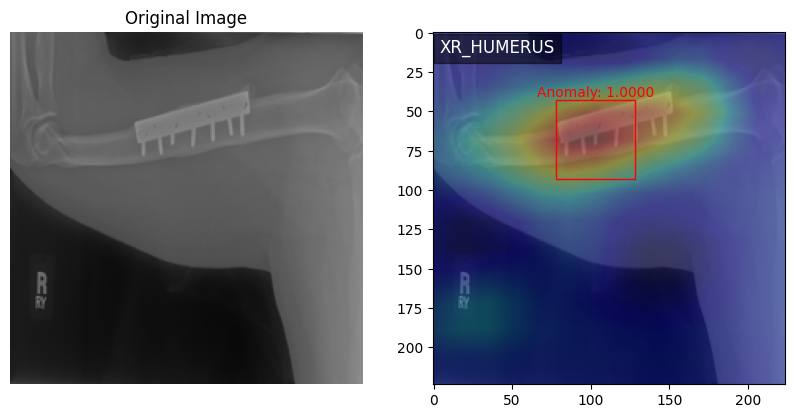

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 375ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 321ms/step


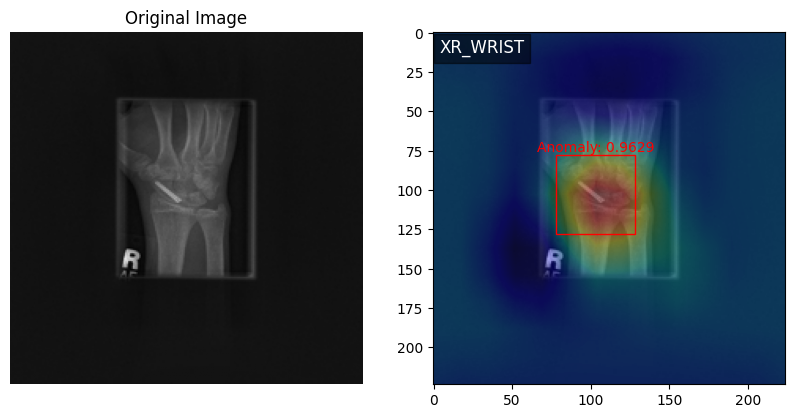

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 443ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 1s 520ms/step


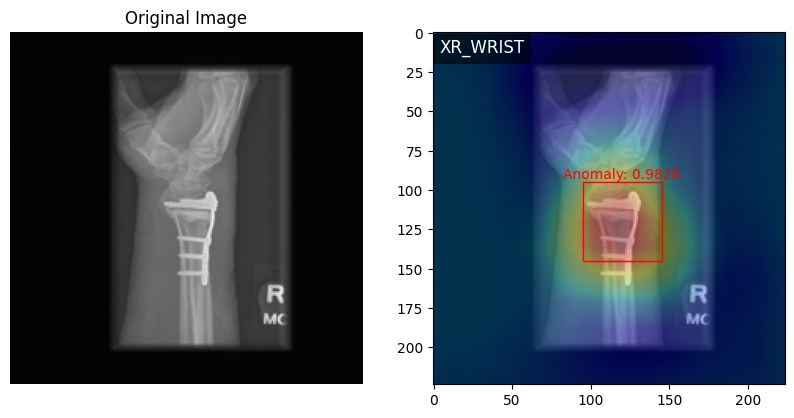

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 418ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 0s 355ms/step


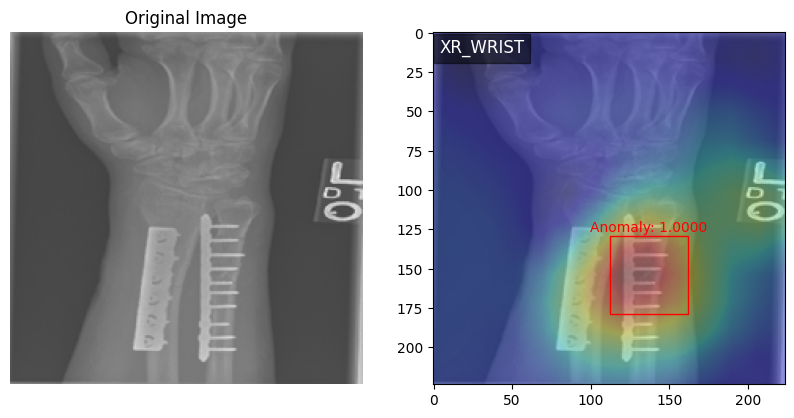

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 434ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 1s 739ms/step


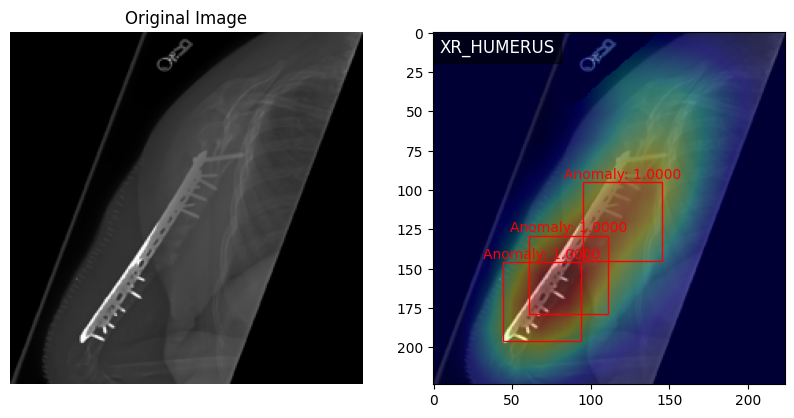

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 452ms/step
Anomaly is present.
Detected body part: XR_WRIST
1/1 [==============================] - 1s 548ms/step


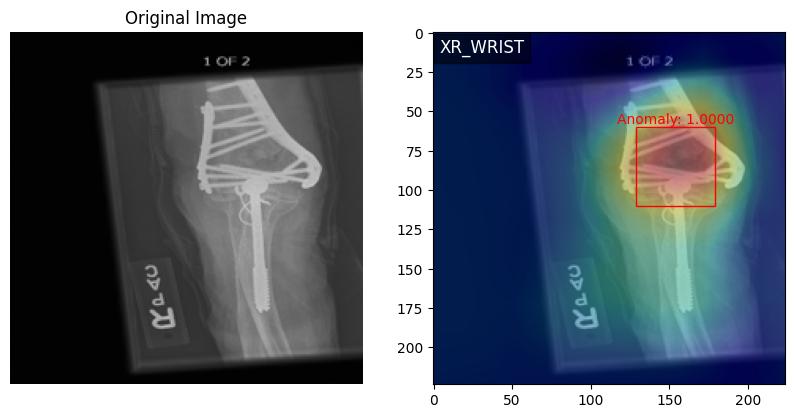

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 423ms/step
Anomaly is present.
Detected body part: XR_ELBOW
1/1 [==============================] - 1s 821ms/step


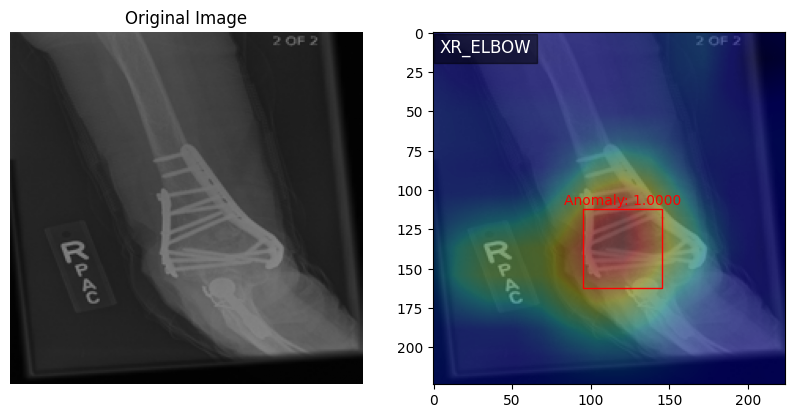

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 451ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 412ms/step


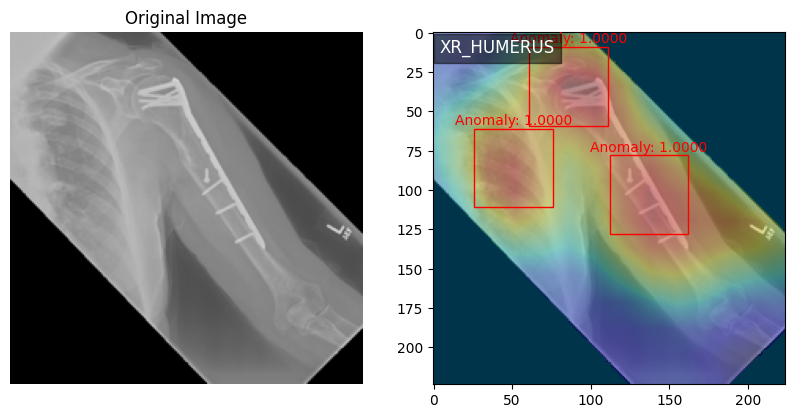

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 449ms/step
Anomaly is present.
Detected body part: XR_ELBOW
1/1 [==============================] - 0s 450ms/step


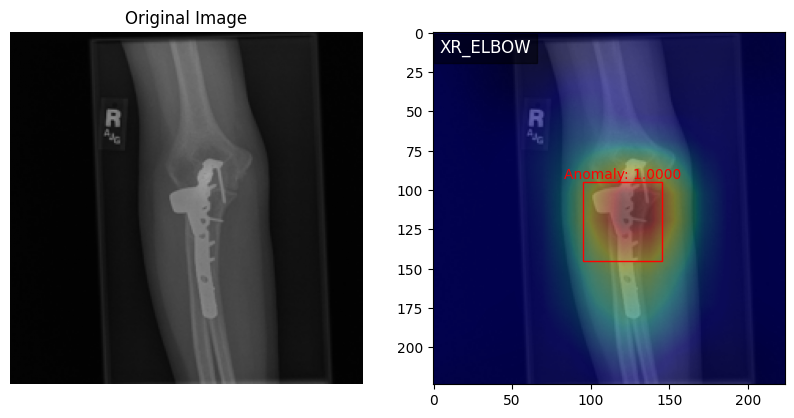

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 480ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 0s 353ms/step


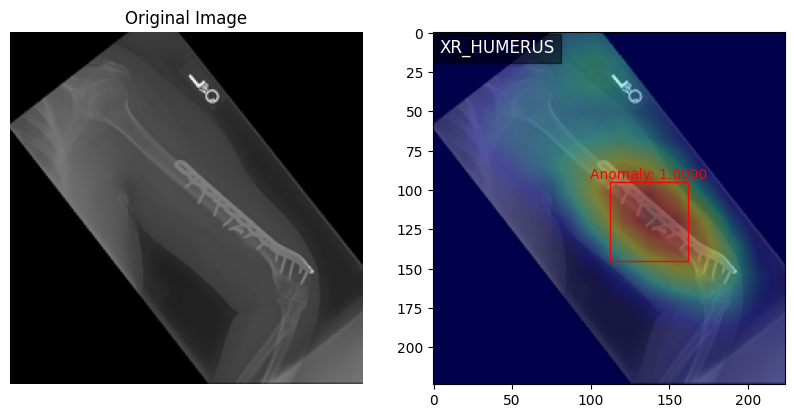

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 368ms/step
Anomaly is present.
Detected body part: XR_ELBOW
1/1 [==============================] - 0s 393ms/step


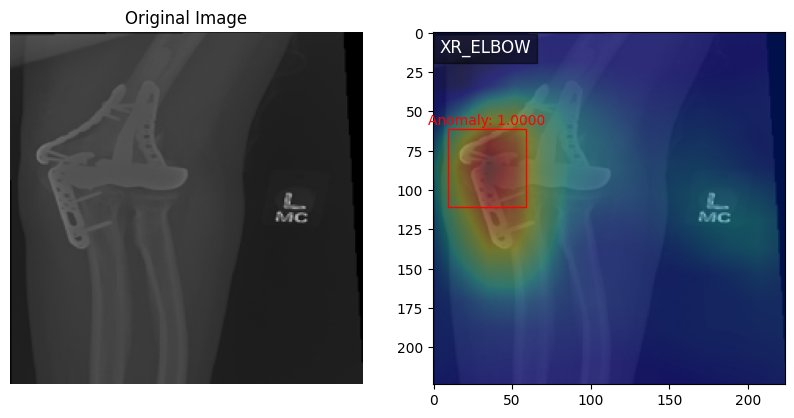

<Figure size 640x480 with 0 Axes>

1/1 [==============================] - 0s 446ms/step
Anomaly is present.
Detected body part: XR_HUMERUS
1/1 [==============================] - 1s 1s/step


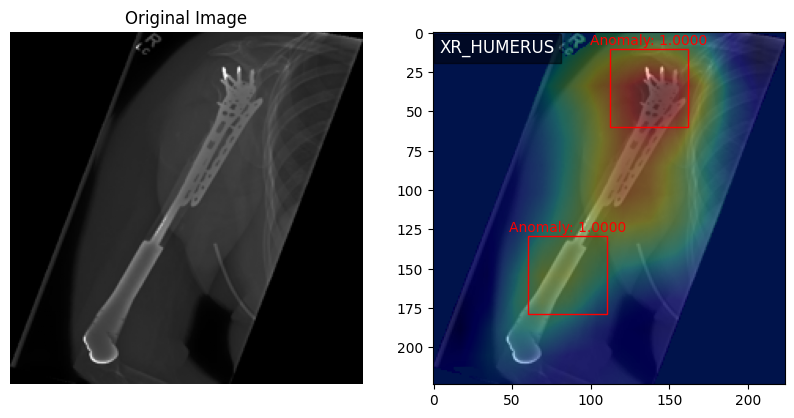

<Figure size 640x480 with 0 Axes>

In [34]:
indices_to_load = [56, 69,85, 100, 112, 148, 201, 203, 207, 250, 269, 464, 89, 107, 230,  260,  536, 538, 540, 548,8, 18, 25, 33, 35, 40, 49,71]

for n in indices_to_load:
    img = X_test[n]
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')  # Assuming the images are grayscale
    plt.title(f'Original Image')
    plt.axis('off')

    img = img.reshape(1, 224, 224, 3)
    prediction = hybrid_model.predict(img)
    body_parts = ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']
    anomaly_threshold = 0.5  # Adjust as needed

    # Check if an anomaly is present based on the second value of the anomaly output
    if prediction[0][0][1] > anomaly_threshold:
        print("Anomaly is present.")
        # Find the index of the highest probability in concatenated_class_output
        max_index = np.argmax(prediction[1])
        body_part_name = body_parts[max_index]
    
        print("Detected body part:", body_parts[max_index])
    else:
        print("No anomaly detected.")

    img = img.reshape(224, 224, 3)
    anomaly_score = prediction[0][0][1]
    
    plt.subplot(1, 2, 2)
    plot_heatmap(img, anomaly_model, anomaly_score, body_part_name)
    

    plt.tight_layout()
    plt.show()
